# Time Series Data

---

## Imports

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
data_dir = os.getcwd() + '/Data/'

# Parse dates and set TIMESTAMP as index. Will be useful later
traindata = pd.read_csv(data_dir + 'TrainData.csv', parse_dates=['TIMESTAMP'], index_col=0)

# Removing WS100 related data
traindata = traindata.drop(['U100', 'V100', 'WS100'], axis=1)
forecast_input = pd.read_csv(data_dir + "WeatherForecastInput.csv", parse_dates=['TIMESTAMP']).filter(['TIMESTAMP'])
solution = pd.read_csv(data_dir + 'Solution.csv')

---

## Formatting

Since we will be working with Timestamp and Power data, we can just drop the others

In [5]:
traindata = traindata.filter(['POWER'], axis=1)
traindata.head()

,POWER
TIMESTAMP,
2012-01-01 01:00:00,0.273678
2012-01-01 02:00:00,0.086796
2012-01-01 03:00:00,0.006811
2012-01-01 04:00:00,0.018646
2012-01-01 05:00:00,0.034812


In [6]:
traindata.index.freq = 'H'

In [7]:
traindata.index

DatetimeIndex(['2012-01-01 01:00:00', '2012-01-01 02:00:00',
               '2012-01-01 03:00:00', '2012-01-01 04:00:00',
               '2012-01-01 05:00:00', '2012-01-01 06:00:00',
               '2012-01-01 07:00:00', '2012-01-01 08:00:00',
               '2012-01-01 09:00:00', '2012-01-01 10:00:00',
               ...
               '2013-10-31 15:00:00', '2013-10-31 16:00:00',
               '2013-10-31 17:00:00', '2013-10-31 18:00:00',
               '2013-10-31 19:00:00', '2013-10-31 20:00:00',
               '2013-10-31 21:00:00', '2013-10-31 22:00:00',
               '2013-10-31 23:00:00', '2013-11-01 00:00:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=16080, freq='H')

---

## Visualising

Text(0.5, 1.0, '2 years')

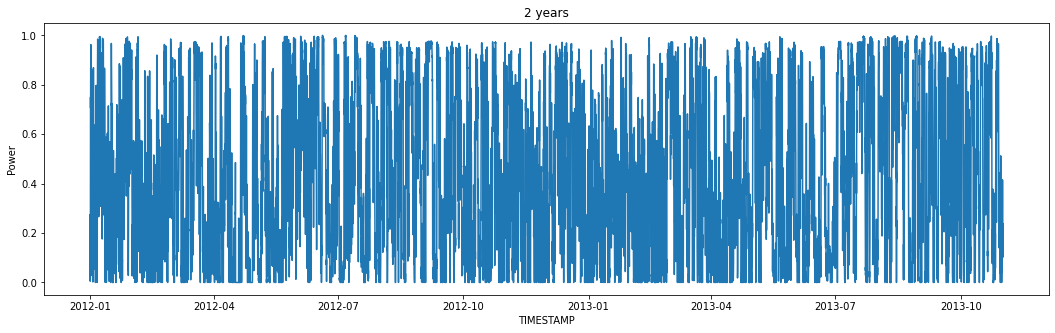

In [8]:
fig, line = plt.subplots(figsize = (18,5))

line = sns.lineplot(x=traindata.index, y=traindata['POWER'])
line.set_ylabel('Power')
line.set_title('2 years')

Text(0.5, 1.0, '1 year')

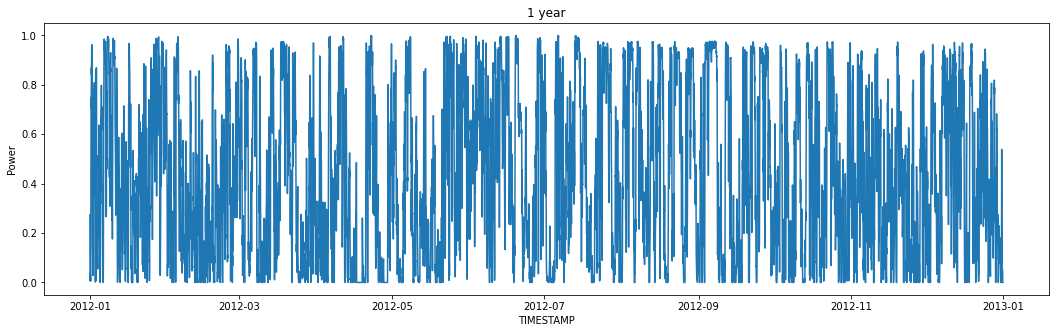

In [9]:
year = traindata.loc['2012']
fig, line = plt.subplots(figsize = (18,5))

line = sns.lineplot(x=year.index, y=year['POWER'])
line.set_ylabel('Power')
line.set_title('1 year')

Text(0.5, 1.0, 'Januray to July 2012')

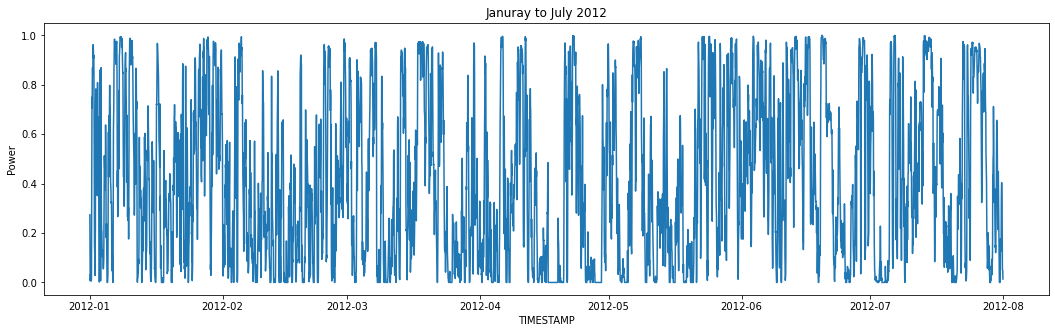

In [10]:
hyear = traindata.loc['2012-01':'2012-07']
fig, line = plt.subplots(figsize = (18,5))

line = sns.lineplot(x=hyear.index, y=hyear['POWER'])
line.set_ylabel('Power')
line.set_title('Januray to July 2012')

Text(0.5, 1.0, 'May 2012')

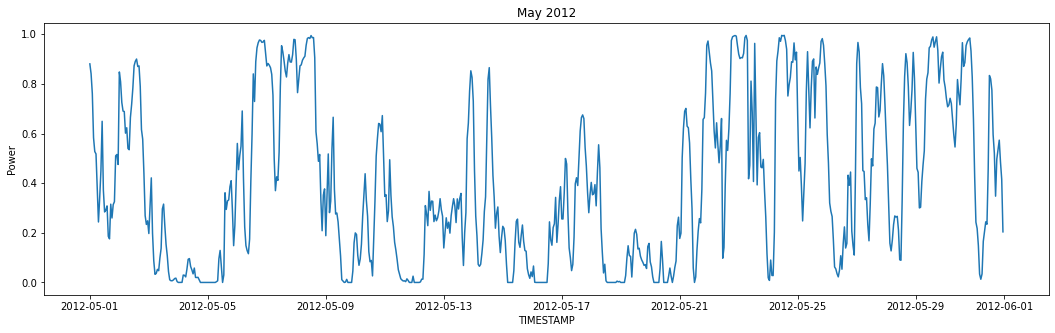

In [11]:
month = traindata.loc['2012-05']
fig, line = plt.subplots(figsize = (18,5))

line = sns.lineplot(x=month.index, y=month['POWER'])
line.set_ylabel('Power')
line.set_title('May 2012')

Text(0.5, 1.0, 'First week of May 2012')

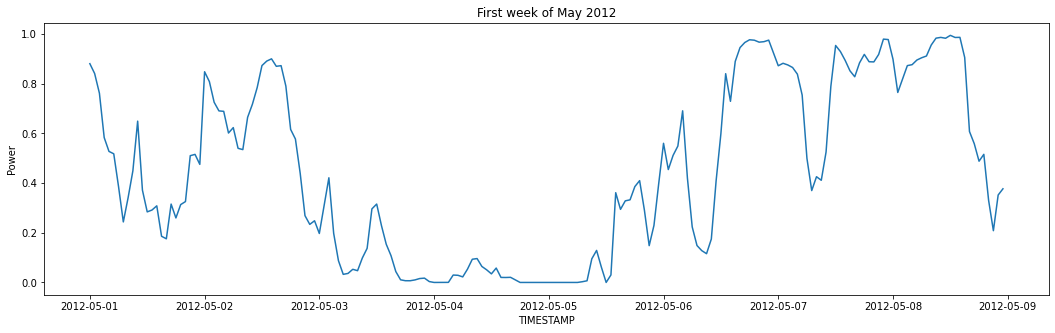

In [12]:
week = traindata.loc['2012-05-01' : '2012-05-08']
fig, line = plt.subplots(figsize = (18,5))

line = sns.lineplot(x=week.index, y=week['POWER'])
line.set_ylabel('Power')
line.set_title('First week of May 2012')

Text(0.5, 1.0, 'First day of May 2012')

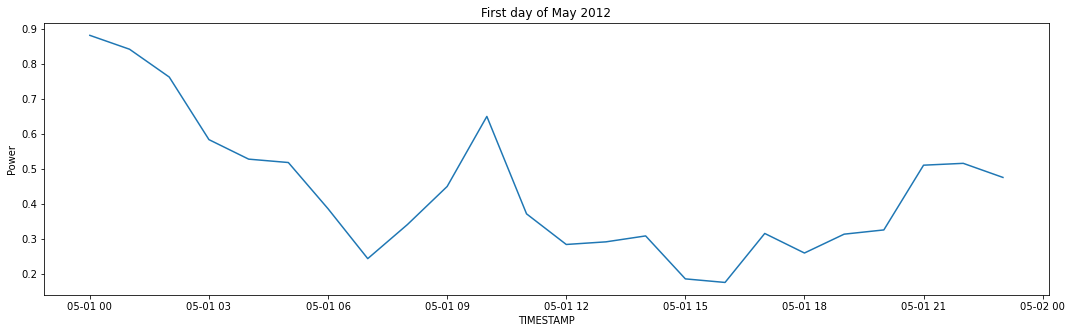

In [13]:
day = traindata.loc['2012-05-01']
fig, line = plt.subplots(figsize = (18,5))

line = sns.lineplot(x=day.index, y=day['POWER'])
line.set_ylabel('Power')
line.set_title('First day of May 2012')

---

## Resampling

This is the aggregation of data over a certain time period. 
We try resampling the data to a day and a week at a time.

In [14]:
weekly_mean = pd.DataFrame(traindata['POWER'].resample('W').mean())
weekly_max = pd.DataFrame(traindata['POWER'].resample('W').max())
daily_mean = pd.DataFrame(traindata['POWER'].resample('D').mean())
daily_max = pd.DataFrame(traindata['POWER'].resample('D').max())

In [15]:
pd.concat([d for d in [daily_mean, daily_max]], axis=1)

,POWER,POWER
TIMESTAMP,,
2012-01-01,0.481577,0.962322
2012-01-02,0.483269,0.835232
2012-01-03,0.312185,0.869182
2012-01-04,0.289363,0.637333
2012-01-05,0.391669,0.797662
...,...,...
2013-10-28,0.754171,0.965844
2013-10-29,0.210563,0.443864
2013-10-30,0.159170,0.512329


In [16]:
pd.concat([w for w in [weekly_mean, weekly_max]], axis=1)

,POWER,POWER
TIMESTAMP,,
2012-01-01,0.481577,0.962322
2012-01-08,0.503264,0.994977
2012-01-15,0.454305,0.988300
2012-01-22,0.344826,0.967345
2012-01-29,0.536319,0.993728
...,...,...
2013-10-06,0.530119,0.954737
2013-10-13,0.519215,0.966123
2013-10-20,0.520385,0.974983


---

## Rolling Windows

In [17]:
d180_rolling_mean = pd.DataFrame(traindata[['POWER']].rolling(window=24*180, center=True).mean())
d90_rolling_mean = pd.DataFrame(traindata[['POWER']].rolling(window=24*90, center=True).mean())
d30_rolling_mean = pd.DataFrame(traindata[['POWER']].rolling(window=24*30, center=True).mean())
weekly_rolling_mean = pd.DataFrame(traindata[['POWER']].rolling(window=24*7, center=True).mean())
weekly_rolling_max = pd.DataFrame(traindata[['POWER']].rolling(window=24*7, center=True).max())
daily_rolling_mean = pd.DataFrame(traindata['POWER'].rolling(window=24, center=True).mean())
daily_rolling_max = pd.DataFrame(traindata['POWER'].rolling(window=24, center=True).max())
h12_rolling_mean = pd.DataFrame(traindata['POWER'].rolling(window=12, center=True).mean())
h6_rolling_mean = pd.DataFrame(traindata['POWER'].rolling(window=6, center=True).mean())

In [18]:
weekly_rolling_mean.isnull().sum()

POWER    167
dtype: int64

In [19]:
weekly_rolling_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16080 entries, 2012-01-01 01:00:00 to 2013-11-01 00:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POWER   15913 non-null  float64
dtypes: float64(1)
memory usage: 767.3 KB


In [20]:
daily_rolling_mean.isnull().sum()

POWER    23
dtype: int64

In [21]:
h12_rolling_mean.isnull().sum()

POWER    11
dtype: int64

In [22]:
h6_rolling_mean.isnull().sum()

POWER    5
dtype: int64

---

# Trends in data

## 2 year span

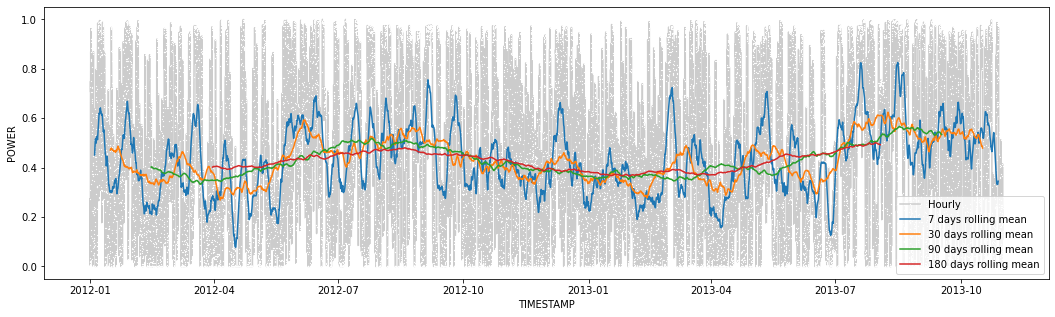

In [23]:
fig, ax = plt.subplots(figsize=(18,5))

# ax.plot(traindata['POWER'], marker='.', markersize=2, color='0.6', label='Hourly')
# ax.plot(d30_rolling_mean['POWER'], linewidth=1)

sns.set_palette('dark')
sns.lineplot(ax=ax, x=traindata.index, y=traindata['POWER'], color='0.8', marker='.', markersize=1, label='Hourly')
sns.lineplot(ax=ax, x=weekly_rolling_mean.index, y=weekly_rolling_mean['POWER'], markersize=0.6, label='7 days rolling mean')
sns.lineplot(ax=ax, x=d30_rolling_mean.index, y=d30_rolling_mean['POWER'], markersize=1, label='30 days rolling mean')
sns.lineplot(ax=ax, x=d90_rolling_mean.index, y=d90_rolling_mean['POWER'], markersize=2, label='90 days rolling mean')
sns.lineplot(ax=ax, x=d180_rolling_mean.index, y=d180_rolling_mean['POWER'], markersize=3, label='180 days rolling mean')

# sns.lineplot(ax=ax, x=daily_rolling_mean.index, y=daily_rolling_mean['POWER'], markersize=1.5)
# sns.lineplot(ax=ax, x=h12_rolling_mean.index, y=h12_rolling_mean['POWER'], markersize=0.8)
# sns.lineplot(ax=ax, x=h6_rolling_mean.index, y=h6_rolling_mean['POWER'], markersize=0.5)

plt.legend(loc='lower right')

## 1 year span

In [24]:
yr_d180_rolling_mean = pd.DataFrame(year['POWER'].rolling(window=24*180, center=True).mean())
yr_d90_rolling_mean = pd.DataFrame(year['POWER'].rolling(window=24*90, center=True).mean())
yr_d30_rolling_mean = pd.DataFrame(year['POWER'].rolling(window=24*30, center=True).mean())
yr_weekly_rolling_mean = pd.DataFrame(year['POWER'].rolling(window=24*7, center=True).mean())

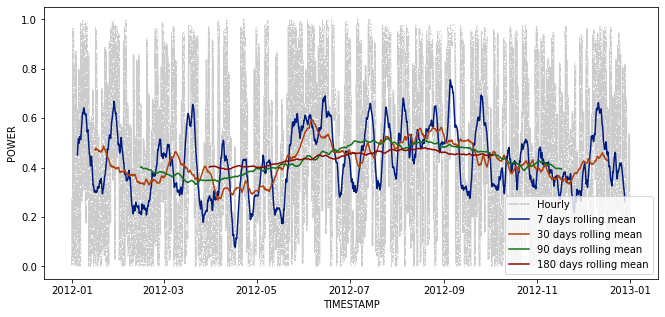

In [25]:
fig, ax = plt.subplots(figsize=(11,5))

sns.lineplot(ax=ax, x=year.index, y=year['POWER'], color='0.8', marker='.', markersize=1, label='Hourly')
sns.lineplot(ax=ax, x=yr_weekly_rolling_mean.index, y=yr_weekly_rolling_mean['POWER'], markersize=0.6, label='7 days rolling mean')
sns.lineplot(ax=ax, x=yr_d30_rolling_mean.index, y=yr_d30_rolling_mean['POWER'], markersize=1, label='30 days rolling mean')
sns.lineplot(ax=ax, x=yr_d90_rolling_mean.index, y=yr_d90_rolling_mean['POWER'], markersize=2, label='90 days rolling mean')
sns.lineplot(ax=ax, x=yr_d180_rolling_mean.index, y=yr_d180_rolling_mean['POWER'], markersize=3, label='180 days rolling mean')
plt.legend(loc='lower right')

## 6 Months

In [26]:
hyr_d30_rolling_mean = pd.DataFrame(hyear['POWER'].rolling(window=24*30, center=True).mean())
hyr_weekly_rolling_mean = pd.DataFrame(hyear['POWER'].rolling(window=24*7, center=True).mean())


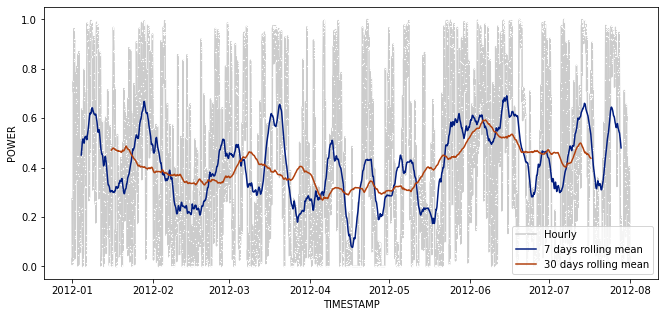

In [27]:
fig, ax = plt.subplots(figsize=(11,5))

sns.lineplot(ax=ax, x=hyear.index, y=hyear['POWER'], color='0.8', marker='.', markersize=1, label='Hourly')
sns.lineplot(ax=ax, x=hyr_weekly_rolling_mean.index, y=hyr_weekly_rolling_mean['POWER'], markersize=0.6, label='7 days rolling mean')
sns.lineplot(ax=ax, x=hyr_d30_rolling_mean.index, y=hyr_d30_rolling_mean['POWER'], markersize=1, label='30 days rolling mean')
plt.legend(loc='lower right')

## 1 Month

In [28]:
m_weekly_rolling_mean = pd.DataFrame(month['POWER'].rolling(window=24*7, center=True).mean())
m_daily_rolling_mean = pd.DataFrame(month['POWER'].rolling(window=24, center=True).mean())

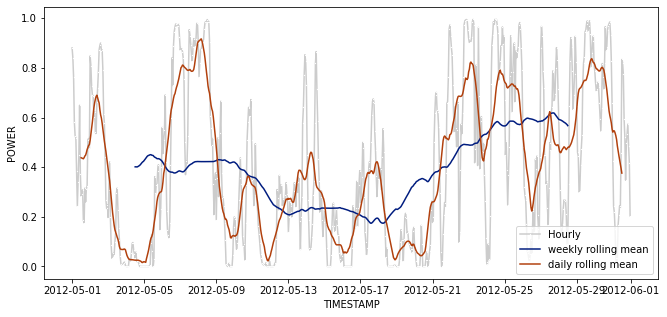

In [29]:
fig, ax = plt.subplots(figsize=(11,5))

sns.lineplot(ax=ax, x=month.index, y=month['POWER'], color='0.8', marker='.', markersize=1, label='Hourly')
sns.lineplot(ax=ax, x=m_weekly_rolling_mean.index, y=m_weekly_rolling_mean['POWER'], markersize=0.6, label='weekly rolling mean')
sns.lineplot(ax=ax, x=m_daily_rolling_mean.index, y=m_daily_rolling_mean['POWER'], markersize=1, label='daily rolling mean')
plt.legend(loc='lower right')

## 1 Week

In [30]:
m_daily_rolling_mean = pd.DataFrame(week['POWER'].rolling(window=24, center=True).mean())
m_12h_rolling_mean = pd.DataFrame(week['POWER'].rolling(window=12, center=True).mean())
m_6h_rolling_mean = pd.DataFrame(week['POWER'].rolling(window=6, center=True).mean())

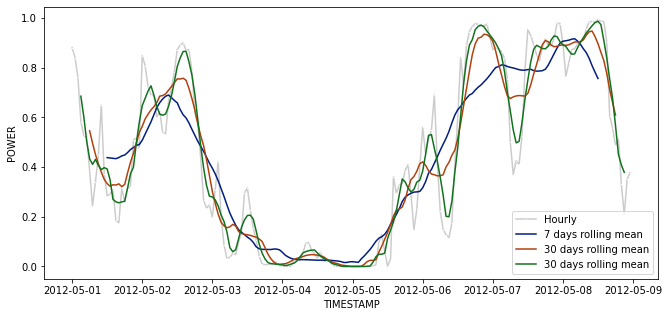

In [31]:
fig, ax = plt.subplots(figsize=(11,5))

sns.lineplot(ax=ax, x=week.index, y=week['POWER'], color='0.8', marker='.', markersize=1, label='Hourly')
sns.lineplot(ax=ax, x=m_daily_rolling_mean.index, y=m_daily_rolling_mean['POWER'], markersize=0.6, label='7 days rolling mean')
sns.lineplot(ax=ax, x=m_12h_rolling_mean.index, y=m_12h_rolling_mean['POWER'], markersize=1, label='30 days rolling mean')
sns.lineplot(ax=ax, x=m_6h_rolling_mean.index, y=m_6h_rolling_mean['POWER'], markersize=1, label='30 days rolling mean')

plt.legend(loc='lower right')

---

# Differencing

In [32]:
traindata_first_order_diff = pd.DataFrame(traindata['POWER'].diff())

In [33]:
pd.concat([w for w in [traindata, traindata_first_order_diff]], axis=1)

,POWER,POWER
TIMESTAMP,,
2012-01-01 01:00:00,0.273678,NaN
2012-01-01 02:00:00,0.086796,-0.186882
2012-01-01 03:00:00,0.006811,-0.079985
2012-01-01 04:00:00,0.018646,0.011835
2012-01-01 05:00:00,0.034812,0.016166
...,...,...
2013-10-31 20:00:00,0.101254,-0.041255
2013-10-31 21:00:00,0.105047,0.003792
2013-10-31 22:00:00,0.145079,0.040033


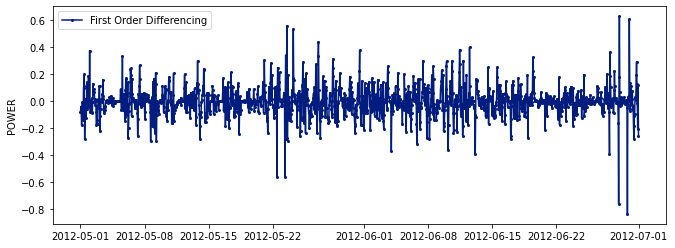

In [34]:
start, end = '2012-05', '2012-06'

fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(traindata_first_order_diff.loc[start:end, 'POWER'],
marker='o', markersize=2, linestyle='-', label='First Order Differencing')
ax.set_ylabel('POWER')
ax.legend();

---

# Autocorrelation

In [1]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(traindata.loc['2012-01-01': '2012-02-01', 'POWER']);

NameError: name 'plt' is not defined

---

# Feature Extraction

In [36]:
traindata['Year'] = traindata.index.year
traindata['Month'] = traindata.index.month
traindata['Weekday_Name'] = traindata.index.weekday
traindata

,POWER,Year,Month,Weekday_Name
TIMESTAMP,,,,
2012-01-01 01:00:00,0.273678,2012,1,6
2012-01-01 02:00:00,0.086796,2012,1,6
2012-01-01 03:00:00,0.006811,2012,1,6
2012-01-01 04:00:00,0.018646,2012,1,6
2012-01-01 05:00:00,0.034812,2012,1,6
...,...,...,...,...
2013-10-31 20:00:00,0.101254,2013,10,3
2013-10-31 21:00:00,0.105047,2013,10,3
2013-10-31 22:00:00,0.145079,2013,10,3


Text(0.5, 1.0, 'Median Power production for each month')

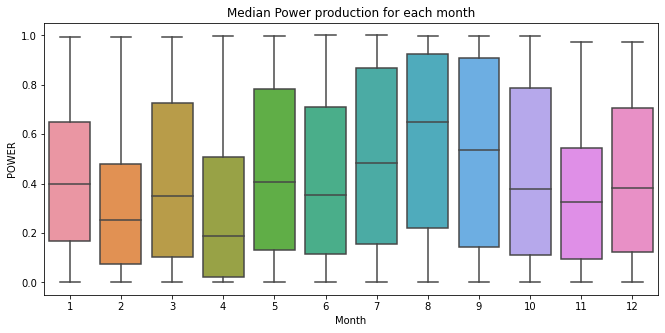

In [37]:
fig, ax = plt.subplots(figsize=(11, 5) )

sns.boxplot(ax=ax, x=traindata['Month'],y=traindata['POWER'])
ax.set_title('Median Power production for each month')